# Funciones

1. Calcular el área de un círculo.
   * Descripción: Crea una función llamada `calcular_area_circulo` que tome el radio como parámetro y devuelva el área del círculo.
   * NOTA: Os dejamos [aquí](https://blogs.ua.es/matesfacil/secundaria-geometria/area-del-circulo/) un link para recordar cómo se calculaba el área de un círculo.

A = pi * r2

In [3]:
def calcular_area_circulo(radio):
    area = 3.141592653589793 * radio**2
    return(round(area, 2)) # pide devolverlo, no imprimirlo; de este modo queda disponible para futuros usos

In [5]:
calcular_area_circulo(2)

12.57


2. Contar la cantidad de caracteres en una cadena.
   * Descripción: Crea una función llamada `contar_caracteres` que tome una cadena como parámetro y devuelva la cantidad de caracteres que contiene.


In [7]:
def contar_caracteres(cadena):
    caracteres = len(cadena)
    return caracteres

In [9]:
contar_caracteres("Ci sono più cose in cielo e in terra")

36

3. Determinar si una cadena es un palíndromo.
   * Descripción: Crea una función llamada `es_palindromo` que tome una cadena como parámetro y devuelva `True` si es un palíndromo, o `False` si no lo es.
   * [¿Qué es un palíndromo?](https://dle.rae.es/pal%C3%ADndromo).

In [37]:
def es_palindromo(cadena):
    cadena = "".join(cadena.lower().split())
    if cadena == cadena[::-1]:
        return True
    else:
        return False

In [40]:
es_palindromo("Adan no cede con nada")

True

In [41]:
es_palindromo("Ínclitas razas ubérrimas")

False

4. Calcular el promedio de una lista de números.
   * Descripción: Crea una función llamada `calcular_promedio` que tome una lista de números como parámetro y devuelva el promedio de todos sus elementos.

In [50]:
def calcular_promedio(numeros):
    promedio = sum(numeros)/len(numeros)
    return promedio

In [51]:
calcular_promedio([1, 2, 3, 4])

2.5

In [ ]:
# para el caso de que no se introdujeran números, evitar errores

def calcular_promedio(numeros):
    if len(numeros) == 0:
        return 0 
    promedio = sum(numeros) / len(numeros)
    return promedio

In [53]:
calcular_promedio([4, 5, 9, 7, 10])

7.0

5. Calcular el interés compuesto.
   * Descripción: Crea una función llamada `calcular_interes_compuesto` que tome el capital inicial, la tasa de interés y el número de períodos como parámetros y devuelva el beneficio final después del interés compuesto.

In [61]:
def calcular_interes_compuesto(capital_inicial, tasa, periodos, annos):
    monto_final = capital_inicial * (1 + tasa/periodos)**(periodos*annos)
    return monto_final

def calcular_interes_compuesto_unica_capitalizacion(capital_inicial, tasa, annos):
    monto_final = capital_inicial * (1 + tasa)**(annos)
    return monto_final

In [63]:
print(calcular_interes_compuesto(1000, 0.05, 4, 10))

print(calcular_interes_compuesto_unica_capitalizacion(1000, 0.005, 10))

1051.2382720179287
1051.1401320407897


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

def interes_compuesto_grafico(capital_inicial, tasa, periodos, annos, aporte_mensual):
    r_periodo = tasa / periodos
    total_periodos = periodos * annos
    meses_totales = annos * 12
    
    # Listas para almacenar evolución
    montos = []
    aportes_acumulados = []
    
    capital = capital_inicial
    total_aportes = 0
    
    for mes in range(1, meses_totales + 1):
        # Añadir aporte mensual
        capital += aporte_mensual
        total_aportes += aporte_mensual
        # Calcular interés del mes (ajustando tasa anual a mensual)
        capital *= (1 + tasa / 12)
        # Guardar cada mes
        montos.append(capital)
        aportes_acumulados.append(total_aportes)
    
    # Crear DataFrame
    df = pd.DataFrame({
        'Mes': range(1, meses_totales + 1),
        'Monto_Total': montos,
        'Aportes_Acumulados': aportes_acumulados
    })
    
    # Gráfico
    plt.figure(figsize=(10,6))
    plt.plot(df['Mes'], df['Monto_Total'], label='Monto Total con Interés')
    plt.plot(df['Mes'], df['Aportes_Acumulados'], label='Aportes Acumulados', linestyle='--')
    plt.xlabel('Meses')
    plt.ylabel('Euros')
    plt.title('Evolución del Capital con Aportaciones y Interés Compuesto')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return df

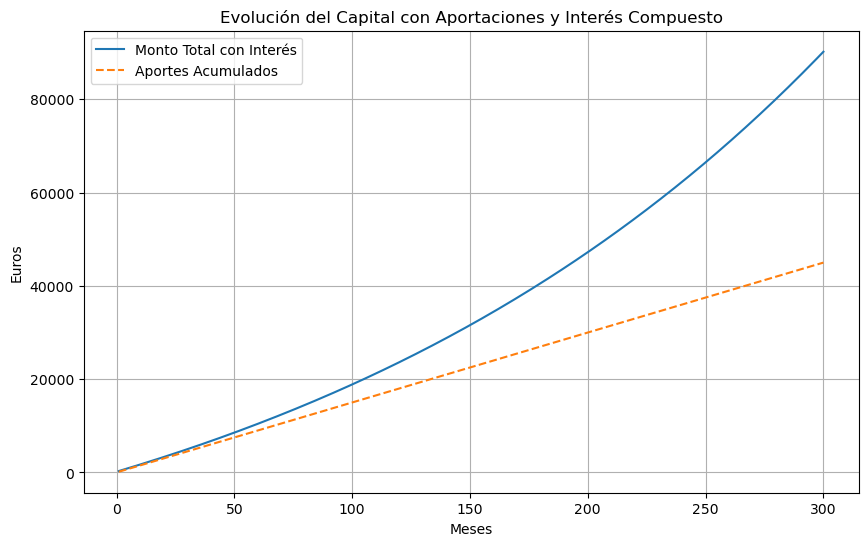

In [76]:
df_resultado = interes_compuesto_grafico(
    capital_inicial=150,
    tasa=0.05,
    periodos=1,
    annos=25,
    aporte_mensual=150)

In [91]:
import pandas as pd
import plotly.graph_objects as go

def interes_compuesto_anual(capital_inicial, tasa, annos, aporte_mensual):
    meses_totales = annos * 12
    capital = capital_inicial
    total_aportes = 0
    intereses_acumulados = 0

    # Listas para almacenar evolución por año
    años = []
    montos = []
    aportes_acum = []
    intereses = []

    for mes in range(1, meses_totales + 1):
        capital += aporte_mensual
        total_aportes += aporte_mensual
        interes_mes = capital * (tasa / 12)
        capital += interes_mes
        intereses_acumulados += interes_mes

        # Guardar al final de cada año
        if mes % 12 == 0:
            año_actual = mes // 12
            años.append(año_actual)
            montos.append(capital)
            aportes_acum.append(total_aportes)
            intereses.append(intereses_acumulados)

    # Crear DataFrame
    df = pd.DataFrame({
        'Año': años,
        'Monto_Total': montos,
        'Aportes_Acumulados': aportes_acum,
        'Intereses_Acumulados': intereses
    })

    # Gráfico interactivo anual
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Año'], y=df['Monto_Total'], mode='lines+markers', name='Monto Total'))
    fig.add_trace(go.Scatter(x=df['Año'], y=df['Aportes_Acumulados'], mode='lines+markers', name='Aportes Acumulados', line=dict(dash='dash')))
    fig.add_trace(go.Scatter(x=df['Año'], y=df['Intereses_Acumulados'], mode='lines+markers', name='Intereses Acumulados', line=dict(dash='dot')))

    fig.update_layout(
        title='Evolución anual del capital con aportaciones e interés compuesto',
        xaxis_title='Años',
        yaxis_title='Euros',
        hovermode='x unified'
    )

    fig.show()
    return df



In [93]:
df_resultado = interes_compuesto_anual(
    capital_inicial=2000,
    tasa=0.05,
    annos=24,
    aporte_mensual=600
)

6. Validar si una palabra es un anagrama de otra.
   * Descripción: Crea una función llamada `es_anagrama` que tome dos palabras como parámetros y devuelva `True` si una es un anagrama de la otra, o `False` si no lo es.
   * [¿Qué es un anagrama?](https://dle.rae.es/anagrama).

In [126]:
def es_anagrama(palabra1, palabra2):
    palabra1 = palabra1.lower()
    palabra1 = sorted(list(palabra1))
    palabra2 = palabra2.lower()
    palabra2 = sorted(list(palabra2))

    return palabra1 == palabra2

In [129]:
es_anagrama("Roma", "amor")

True

7. Validar si una cadena de texto es un isograma.
   * Descripción: Crea una función llamada `es_isograma` que tome una cadena de texto como parámetro y devuelva `True` si es un isograma. En caso contrario, devuelve `False`.
   * ¿Qué es un isograma? Una palabra que no contiene letras repetidas.

In [125]:
def es_isograma(cadena):
    cadena = list(cadena.lower())
    return sorted(cadena) == sorted(set(cadena))

es_isograma("hola")

True

In [122]:
def es_isograma(cadena):
    cadena = cadena.lower()
    return len(cadena) == len(set(cadena))

False

8. Concatenar múltiples cadenas de texto
   * Descripción: Crea una función llamada `concatenar_cadenas` que tome una cantidad variable de cadenas de texto como argumentos y devuelva una única cadena que contenga la concatenación de todas las cadenas ingresadas.

In [135]:
def concatenar_cadenas(*args):
    return ", ".join(args)

In [136]:
concatenar_cadenas("hola", "adios")

'hola, adios'

9. Crear un diccionario con información de una persona.
   * Descripción: Crea una función llamada `crear_persona` que tome como argumentos clave-valor los datos de una persona, como nombre, edad, ciudad, etc., y devuelva un diccionario con toda la información ingresada.

10. Encontrar el número que falta en una lista ordenada de números consecutivos.
    * Descripción: Crea una función llamada `encontrar_numero_faltante` que tome una lista de números consecutivos (del 1 al N, sin repetir) con un número faltante y devuelva ese número faltante.

11. Encontrar el elemento duplicado en una lista de números.
    * Descripción: Crea una función llamada `encontrar_duplicado` que tome una lista de números enteros y devuelva el elemento que está duplicado en la lista.